## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [30]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi


Thu Oct 08 02:48:29 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 452.06       Driver Version: 452.06       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 2060   WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   50C    P8    17W / 170W |   4401MiB /  6144MiB |      5%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

In [39]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "TCC/WDDM"


In [40]:
train, test = keras.datasets.cifar10.load_data()

In [41]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x,flatten=True):
    x = x /255*2-1
    if flatten == True :
        x = x.reshape(len(x),-1) 
    return x
def preproc_y(y , num_classes = 10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y,num_classes) 
    return y

In [42]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [43]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape , output_units = 10 , num_nerous = [512,256,128,128,64,32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i , n_units in enumerate(num_nerous):
        if i == 0:
            x = keras.layers.Dense(units = n_units ,
                                   activation = 'relu' ,
                                   name = 'hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units = n_units ,
                                  activation = 'relu',
                                  name = 'hidden_layer'+str(i+1))(x)
            
    out = keras.layers.Dense(units = output_units ,activation = 'softmax',
                                  name = "output")(x)
    model = keras.models.Model(inputs = [input_layer],
                              outputs = [out])
    return model


In [44]:
model = build_mlp(input_shape=x_train.shape[1:])

model.summary()


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 32)               

In [45]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [46]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [47]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 2s 11ms/step - loss: 1.7307 - accuracy: 0.3864 - val_loss: 1.5728 - val_accuracy: 0.4409
Epoch 2/100
196/196 [==============================] - 2s 10ms/step - loss: 1.4974 - accuracy: 0.4736 - val_loss: 1.4855 - val_accuracy: 0.4783
Epoch 3/100
196/196 [==============================] - 2s 10ms/step - loss: 1.3770 - accuracy: 0.5165 - val_loss: 1.4248 - val_accuracy: 0.5022
Epoch 4/100
196/196 [==============================] - 2s 10ms/step - loss: 1.2895 - accuracy: 0.5477 - val_loss: 1.3844 - val_accuracy: 0.5132
Epoch 5/100
196/196 [==============================] - 2s 10ms/step - loss: 1.2034 - accuracy: 0.5760 - val_loss: 1.3846 - val_accuracy: 0.5184
Epoch 6/100
196/196 [==============================] - 2s 10ms/step - loss: 1.1286 - accuracy: 0.6031 - val_loss: 1.3729 - val_accuracy: 0.5306
Epoch 7/100
196/196 [==============================] - 2s 10ms/step - loss: 1.0532 - accuracy: 0.6289 - val_loss: 1.3869 - val_accuracy:

196/196 [==============================] - 2s 10ms/step - loss: 0.1054 - accuracy: 0.9658 - val_loss: 3.5610 - val_accuracy: 0.5272
Epoch 58/100
196/196 [==============================] - ETA: 0s - loss: 0.1082 - accuracy: 0.96 - 2s 10ms/step - loss: 0.1077 - accuracy: 0.9642 - val_loss: 3.8413 - val_accuracy: 0.5280
Epoch 59/100
196/196 [==============================] - 2s 10ms/step - loss: 0.1039 - accuracy: 0.9655 - val_loss: 3.8460 - val_accuracy: 0.5258
Epoch 60/100
196/196 [==============================] - 2s 10ms/step - loss: 0.1055 - accuracy: 0.9659 - val_loss: 3.7029 - val_accuracy: 0.5280
Epoch 61/100
196/196 [==============================] - 2s 10ms/step - loss: 0.0918 - accuracy: 0.9704 - val_loss: 3.8486 - val_accuracy: 0.5289
Epoch 62/100
196/196 [==============================] - 2s 10ms/step - loss: 0.1138 - accuracy: 0.9630 - val_loss: 3.7046 - val_accuracy: 0.5207
Epoch 63/100
196/196 [==============================] - 2s 10ms/step - loss: 0.1046 - accuracy: 0.965

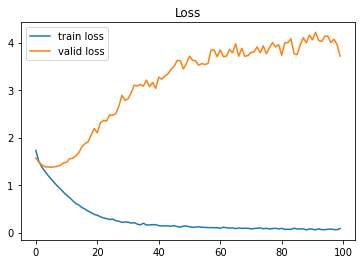

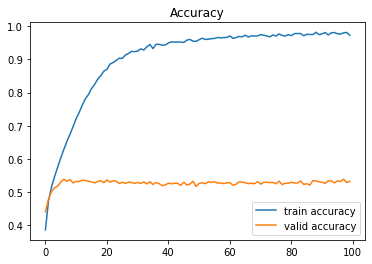

In [48]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()